In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use("bmh")

In [2]:
# funcion para campo electrico


def campo_electrico(X, Y, q, q_loc):
    # Actualizar matrices de coordenadas
    X_new = X-q_loc[0]
    Y_new = Y-q_loc[1]
    # Constante de Coulomb
    k_e = 8987539422

    # Matrices de radio cuadrado y radio
    r_2 = X_new**2+Y_new**2
    r = r_2**(1/2)

    # Matriz 1/r para los componentes
    r_1_2 = r_2**-1

    # Relacion Trigonometrica para angles
    rel = np.divide(X_new, r)
    angles = np.angle(X_new+Y_new*1j) 
    mcos = np.cos(angles)
    msin = np.sin(angles)
    # Componentes del campo electrico
    Ex = k_e*q*r_1_2*mcos
    Ey = k_e*q*r_1_2*msin

    return Ex, Ey

In [3]:
def Barra_electrica(X, Y, q, minX, maxX, y, N):
    q = q

    # Definir coordenasas, x es un espacio lineal con todas las coordenadas
    qloc_x_range = np.linspace(minX, maxX, N)
    qloc_y = y

    # Inicializar campo electrico
    Ex = np.zeros((len(X), len(X[0])))
    Ey = np.zeros((len(X), len(X[0])))

    for i, qloc_x in enumerate(qloc_x_range):

        # Para correr este paso necesitas asegurarte que la función getField() funcione correctamente
        this_Ex, this_Ey = campo_electrico(X, Y, q, [qloc_x, qloc_y])

        # Actualiza los valores de Ex y Ey
        Ex = Ex + this_Ex
        Ey = Ey + this_Ey

    return Ex, Ey


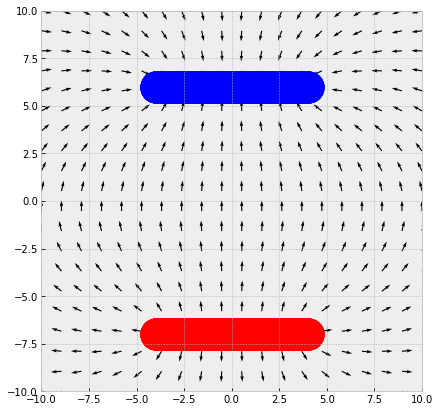

In [4]:
def main():
    # Parametros Iniciales
    #N = 20
    grid_min = -10
    grid_max = 10
    
    N = abs(grid_min)+ abs(grid_max)
    # Incializar espacios lineales

    x = np.linspace(grid_min, grid_max, N)
    y = np.linspace(grid_min, grid_max, N)

    # Crear Matrices de coordenadas vectoriales
    X, Y = np.meshgrid(x, y)

    # Definir coordenasas, x es un espacio lineal con todas las coordenadas
    minX = -4
    maxX = 4

    # Definir carga 1
    q = -20*math.exp(-6)
    qloc_y = 6
    # Definir carga 2
    q2 = 20*math.exp(-6)
    qloc_y2 = -7

    # Parametros Barra electrica
    total_unidades = abs(minX) + abs(maxX)
    carga_por_unidad = 30

    Nb = carga_por_unidad * total_unidades

    Ex1, Ey1 = Barra_electrica(X, Y, q, minX, maxX, qloc_y, Nb)
    Ex2, Ey2 = Barra_electrica(X, Y, q2, minX, maxX, qloc_y2, Nb)

    Ex = Ex1 + Ex2
    Ey = Ey1 + Ey2
    mags = (Ex**2+Ey**2)**(1/2)

    # Vectores Unitarios
    Ex_unit = np.divide(Ex, mags)
    Ey_unit = np.divide(Ey, mags)

    # Crear ejes y Figura
    fig, ax = plt.subplots(figsize=(7, 7))
    # Crear Campo Vectorial
    ax.quiver(X, Y, Ex_unit, Ey_unit)

    # Dibujar Carga puntual
    for i, qloc_x in enumerate(np.linspace(minX, maxX, 1000)):
        ax.scatter(qloc_x, qloc_y, c='blue', s=1000)
        ax.scatter(qloc_x, qloc_y2, c='red', s=1000)
    # Configuramos las dimensiones del eje y el aspecto
    ax.axis([grid_min, grid_max, grid_min, grid_max])
    ax.set_aspect('equal', 'box')

    plt.show()


main()
